

### Background:

In the dynamic automotive industry, accurately estimating vehicle prices is crucial for car owners looking to buy or sell their vehicles. However, crucial factors are often overlooked by traditional methods of pricing vehicles and leading to inaccurate price estimations.  

--- 

### Objective:

The objective is to help consumers analyse trends in the automotive market to estimate vehicle prices based on various attributes. By leveraging a dataset containing individual vehicle sales transactions and associated attributes, including condition, mileage, brand, and more, we aim to provide valuable insights and tools for market analysis and price prediction. 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Import from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
np.random.seed(0)

In [2]:
# Import the Dataset
sales_data = pd.read_csv('car_prices.csv')
sales_data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [3]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


###

Description of the dataset, as available on Kaggle, is as follows.
Learn more : https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data/data
> **year** : The manufacturing year of the vehicle         
> **make** : The brand or manufacturer of the vehicle        
> **model** : The specific model of the vehicle        
> **trim** : Additional designation for the vehicle model       
> **body** : The body type of the vehicle (e.g., SUV, Sedan)       
> **transmission** : The type of transmission in the vehicle (e.g., automatic)       
> **vin** : Vehicle Identification Number, a unique code for each vehicle      
> **state** : The state where the vehicle is registered       
> **condition** : Condition of the vehicle, possibly rated on a scale      
> **odometer** : The mileage or distance traveled by the vehicle     
> **color** : Exterior color of the vehicle    
> **interior** : Interior color of the vehicle     
> **seller** : The entity selling the vehicle      
> **mmr** : Manheim Market Report, possibly indicating the estimated market value of the vehicle    
> **sellingprice** : The price at which the vehicle was sold      
> **saledate** : The date and time when the vehicle was sold    

---
### Cleaning of Data (Review Lecture @20mins)


Things to do:

1. Rename column names to an understandable names
2. Check for null values
3. Remove columns with no meaning (optional)

In [4]:
# Rename of column names to new understandable names
sales_data.rename(columns={
    "year": "Manufacturing Year",
    "make": "Brand",
    "trim": "Model Version",
    "body": "Vehicle Type",
    "transmission" : "Gear",
    "vin" : "Vehicle ID",
    "state" : "Registration State",
    "odometer" : "Mileage",
    "color" : "Exterior Colour",
    "interior" : "Interior Colour",
    "mmr" : "Market Value",
    "sellingprice" : "Selling Price",
    "saledate" : "Sale Date"
}, inplace=True)

# Convert all variable names to uppercase
sales_data.columns = sales_data.columns.str.upper()
cleaned_data = sales_data
cleaned_data.head()

,MANUFACTURING YEAR,BRAND,MODEL,MODEL VERSION,VEHICLE TYPE,GEAR,VEHICLE ID,REGISTRATION STATE,CONDITION,MILEAGE,EXTERIOR COLOUR,INTERIOR COLOUR,SELLER,MARKET VALUE,SELLING PRICE,SALE DATE
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [5]:
# Cleaning the data (Check for NULL values)
cleaned_data.isnull().sum()

MANUFACTURING YEAR        0
BRAND                 10301
MODEL                 10399
MODEL VERSION         10651
VEHICLE TYPE          13195
GEAR                  65352
VEHICLE ID                4
REGISTRATION STATE        0
CONDITION             11820
MILEAGE                  94
EXTERIOR COLOUR         749
INTERIOR COLOUR         749
SELLER                    0
MARKET VALUE             38
SELLING PRICE            12
SALE DATE                12
dtype: int64

In [6]:
# Drop missing values
cleaned_data.dropna(inplace=True)
cleaned_data.isnull().sum()

MANUFACTURING YEAR    0
BRAND                 0
MODEL                 0
MODEL VERSION         0
VEHICLE TYPE          0
GEAR                  0
VEHICLE ID            0
REGISTRATION STATE    0
CONDITION             0
MILEAGE               0
EXTERIOR COLOUR       0
INTERIOR COLOUR       0
SELLER                0
MARKET VALUE          0
SELLING PRICE         0
SALE DATE             0
dtype: int64

In [7]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 472325 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   MANUFACTURING YEAR  472325 non-null  int64  
 1   BRAND               472325 non-null  object 
 2   MODEL               472325 non-null  object 
 3   MODEL VERSION       472325 non-null  object 
 4   VEHICLE TYPE        472325 non-null  object 
 5   GEAR                472325 non-null  object 
 6   VEHICLE ID          472325 non-null  object 
 7   REGISTRATION STATE  472325 non-null  object 
 8   CONDITION           472325 non-null  float64
 9   MILEAGE             472325 non-null  float64
 10  EXTERIOR COLOUR     472325 non-null  object 
 11  INTERIOR COLOUR     472325 non-null  object 
 12  SELLER              472325 non-null  object 
 13  MARKET VALUE        472325 non-null  float64
 14  SELLING PRICE       472325 non-null  float64
 15  SALE DATE           472325 non-null  ob

In [8]:
cleaned_data.to_csv('cleaned_data.csv', index=False)

## Exploratory Data Analysis

1. Separate Numerical and Categorical data

#### Univariate Analysis
2. Plot distributions of numerical data
3. Plot distributions of categorical data

#### Bivariate Analysis
4. Plot predictors against response (Correlation)

In [9]:
# Display data types of each column
print(cleaned_data.dtypes)

# Separate Numerical and Categorical Variables
numerical_columns = cleaned_data.select_dtypes(include=['int64','float64']).columns
categorical_columns = cleaned_data.select_dtypes(include=['object']).columns

MANUFACTURING YEAR      int64
BRAND                  object
MODEL                  object
MODEL VERSION          object
VEHICLE TYPE           object
GEAR                   object
VEHICLE ID             object
REGISTRATION STATE     object
CONDITION             float64
MILEAGE               float64
EXTERIOR COLOUR        object
INTERIOR COLOUR        object
SELLER                 object
MARKET VALUE          float64
SELLING PRICE         float64
SALE DATE              object
dtype: object


C:\Users\Dylan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


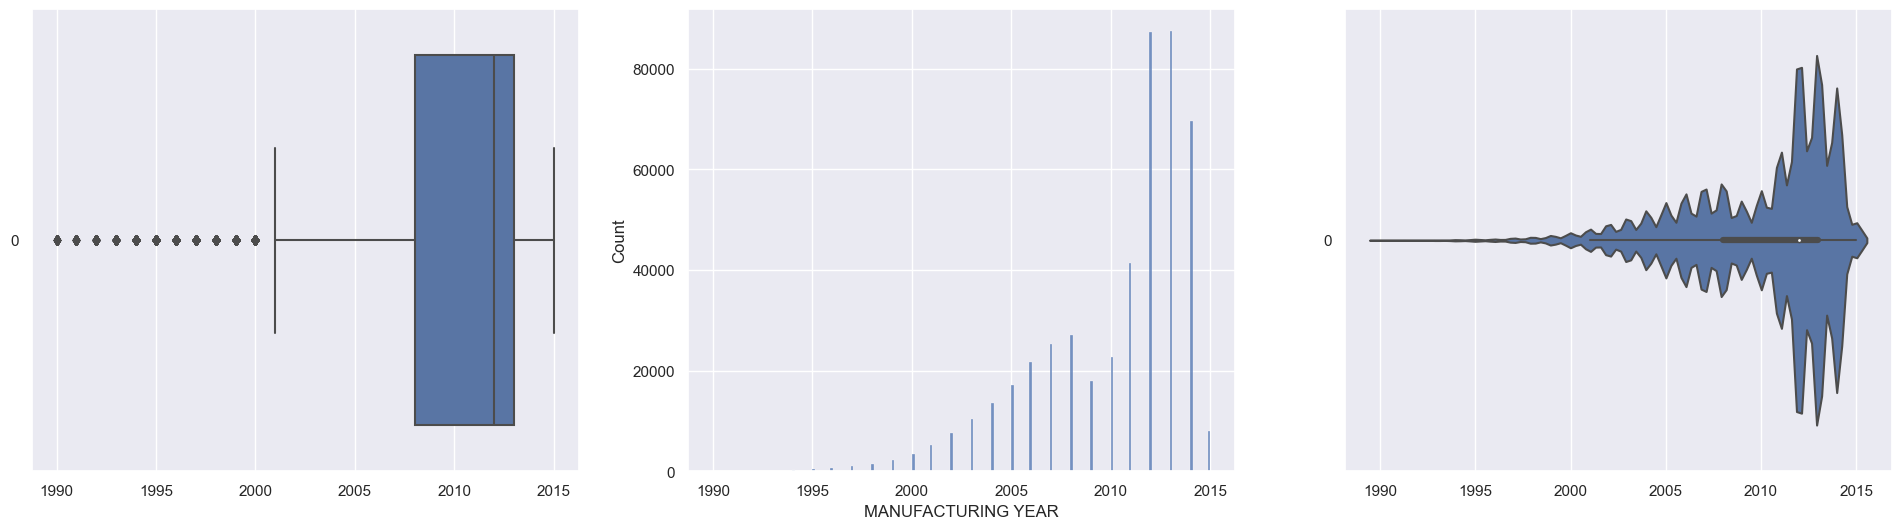

C:\Users\Dylan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


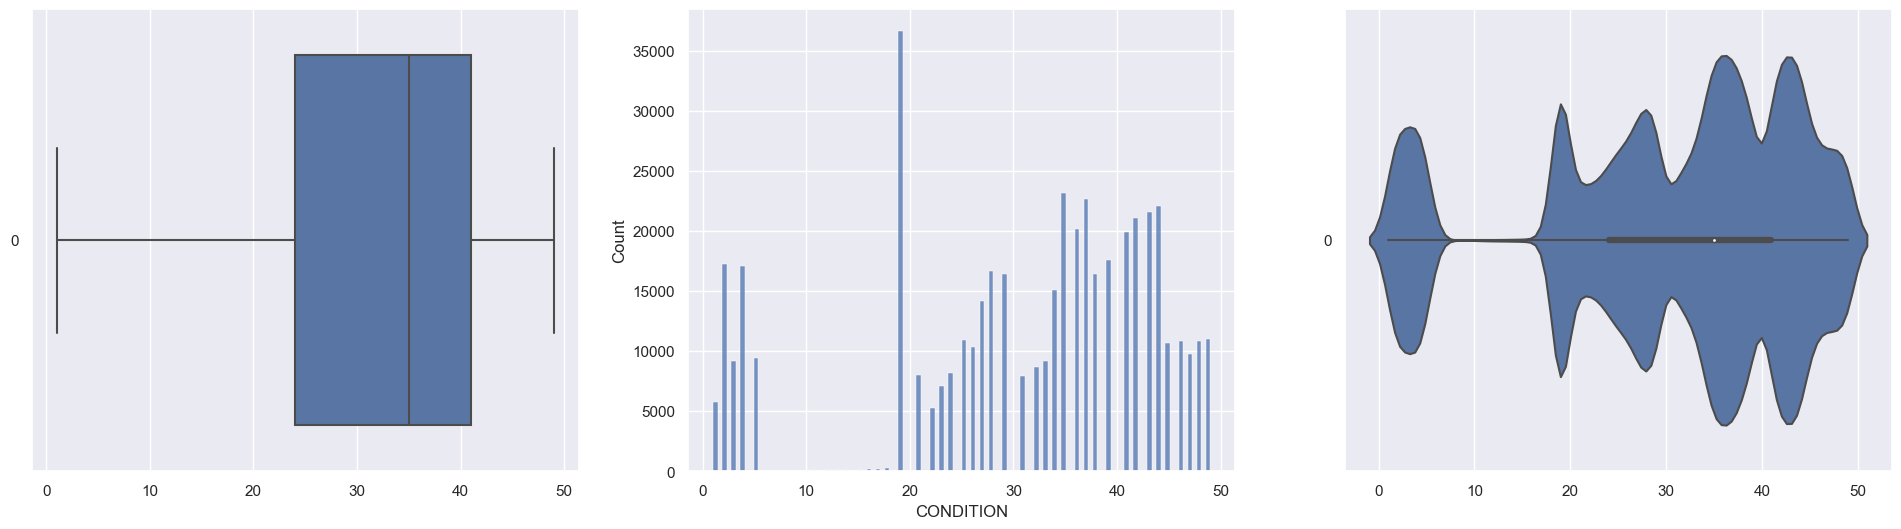

C:\Users\Dylan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


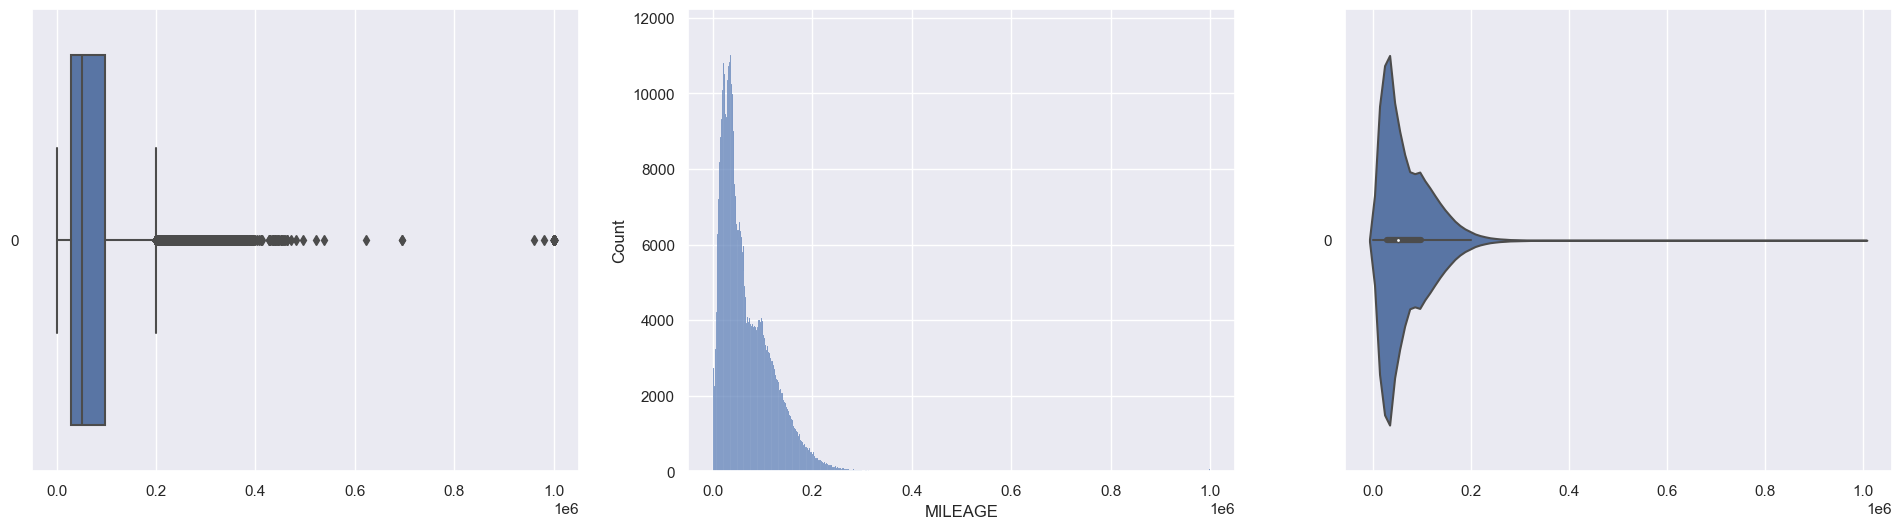

C:\Users\Dylan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


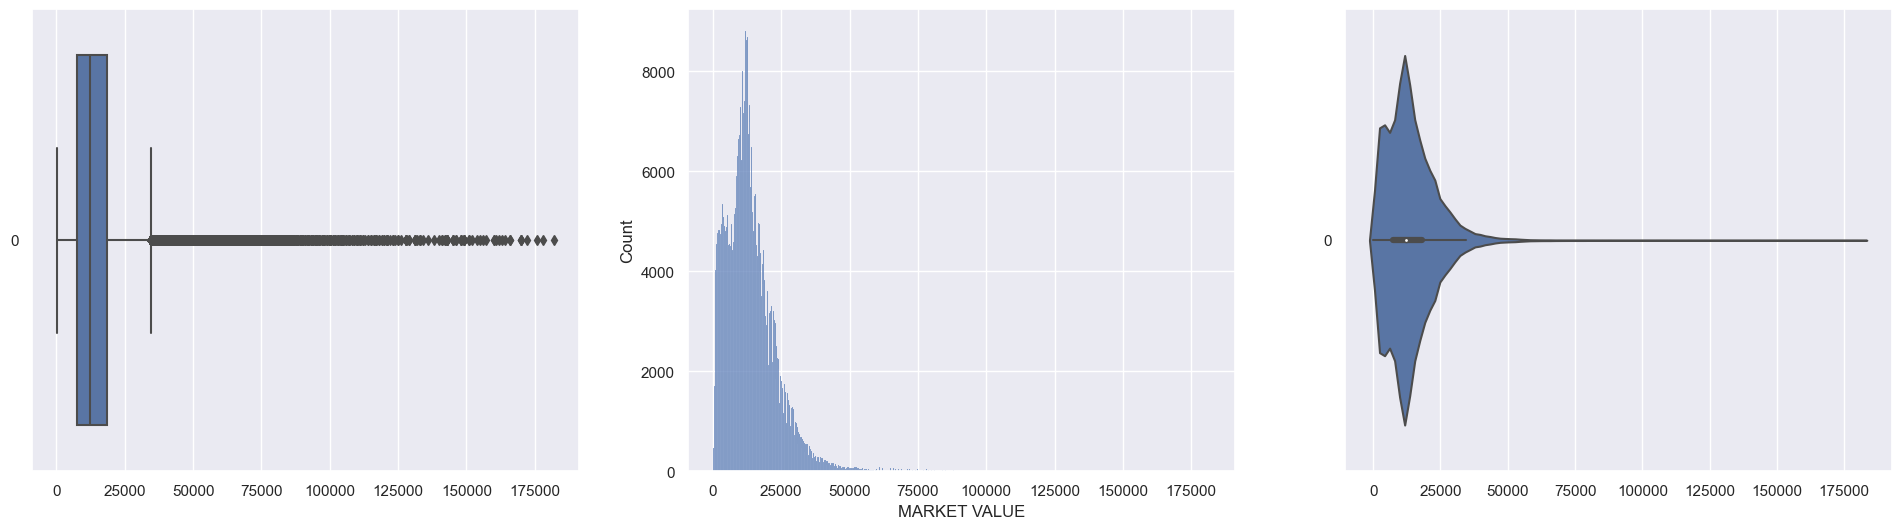

C:\Users\Dylan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


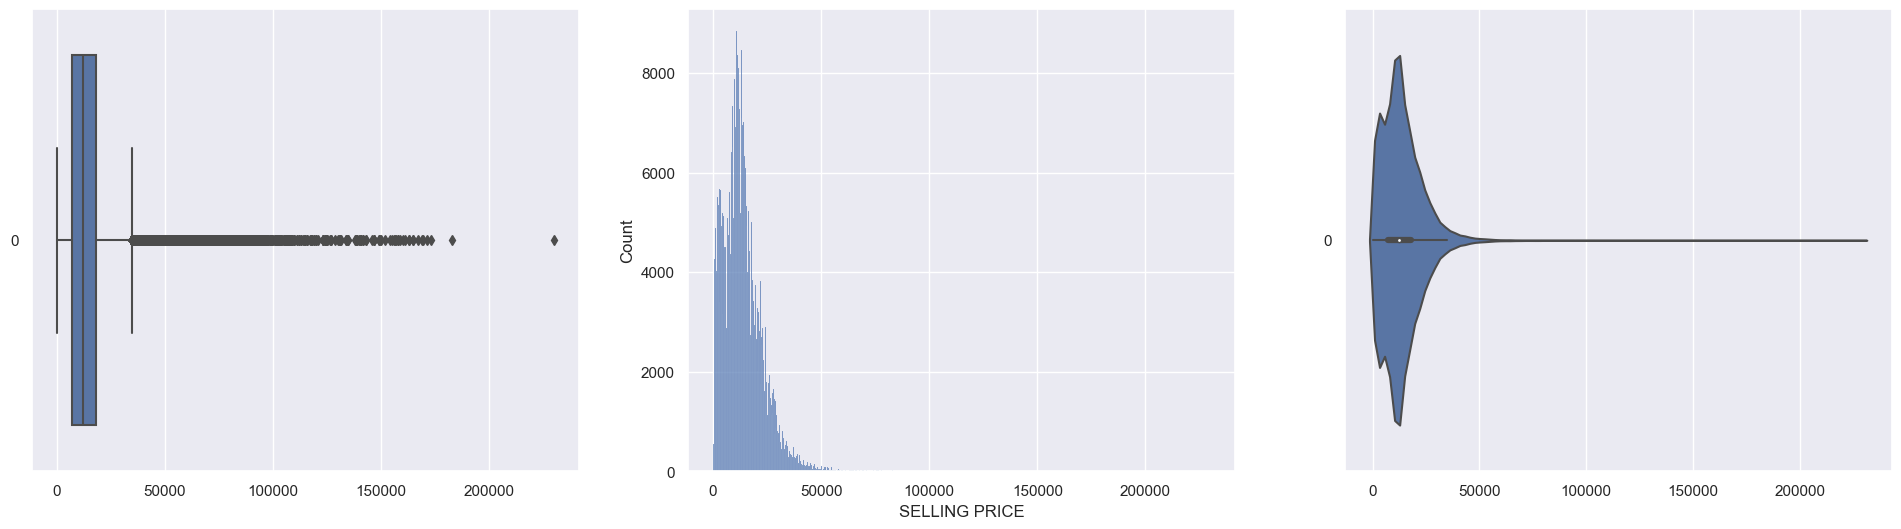

In [10]:
# Distributions of numerical variables

for col in numerical_columns:
    f, axes = plt.subplots(1, 3, figsize=(24, 6))
    sb.boxplot(data = cleaned_data[col], orient = "h", ax = axes[0])
    sb.histplot(data = cleaned_data[col], ax = axes[1])
    sb.violinplot(data = cleaned_data[col], orient = "h", ax = axes[2])
    plt.show()

C:\Users\Dylan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


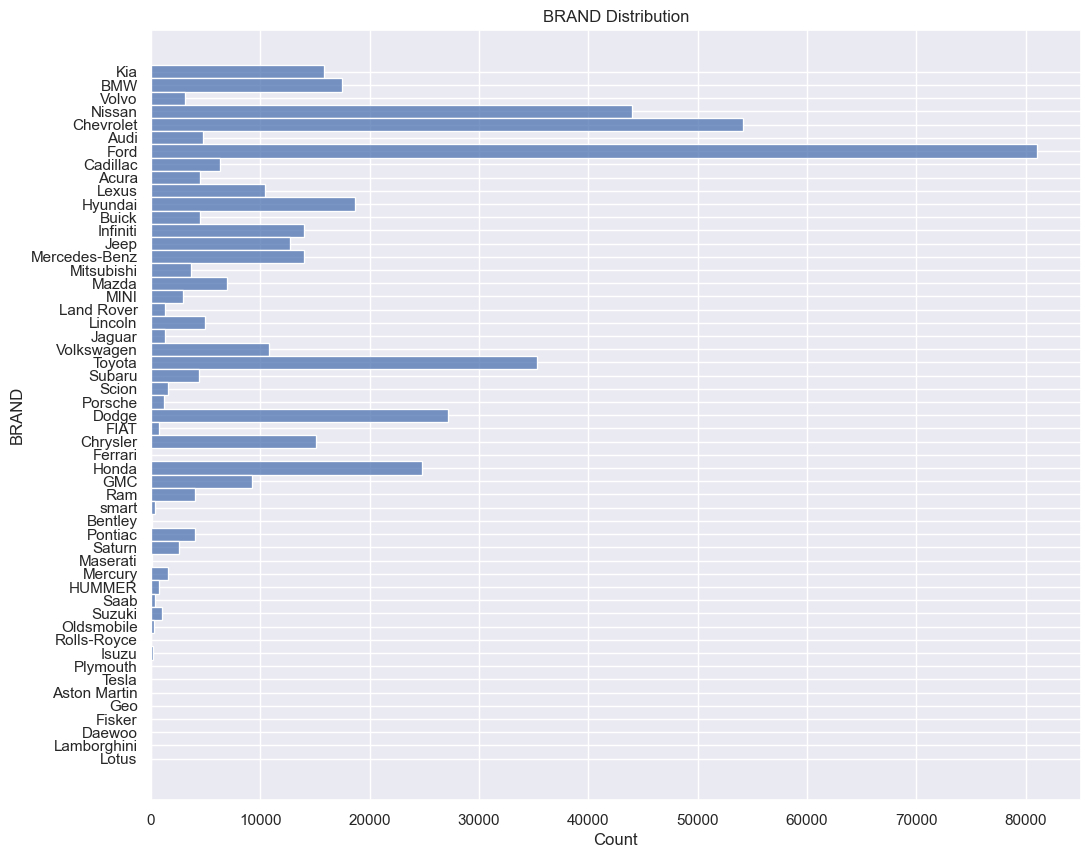

C:\Users\Dylan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


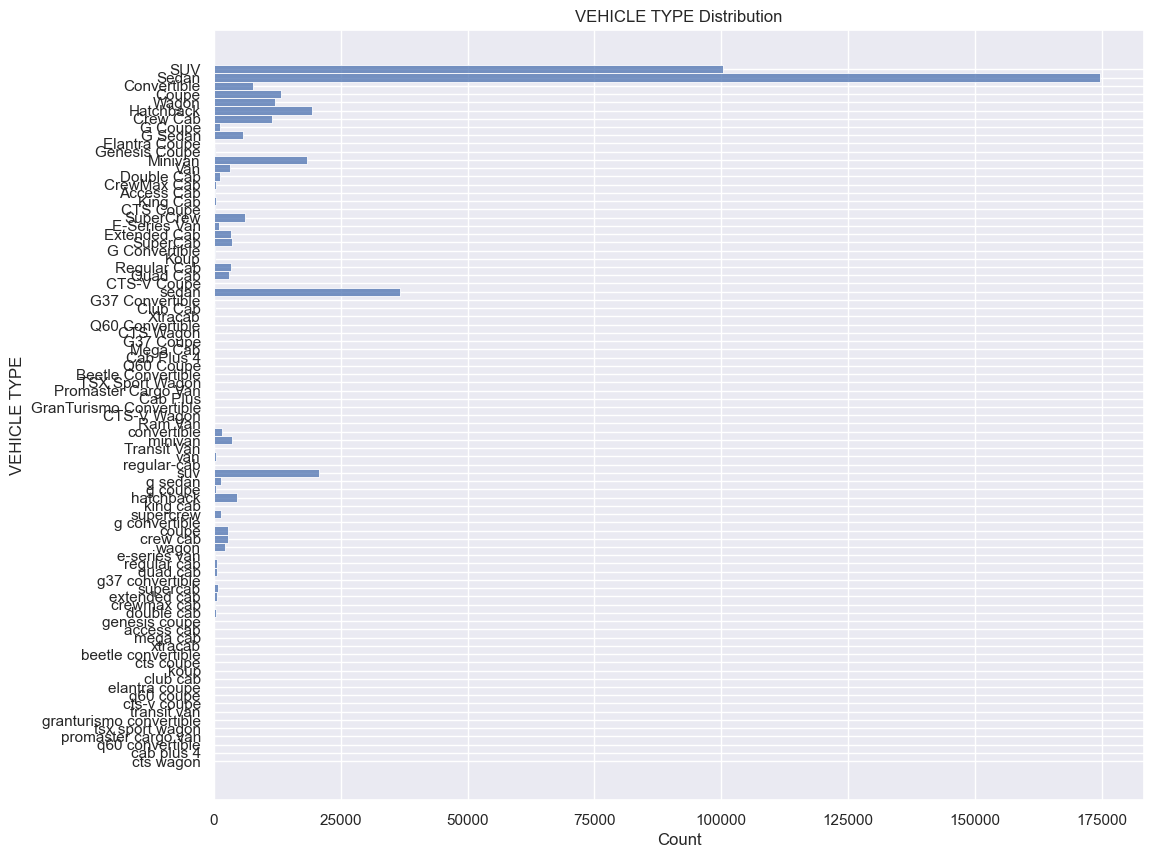

C:\Users\Dylan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


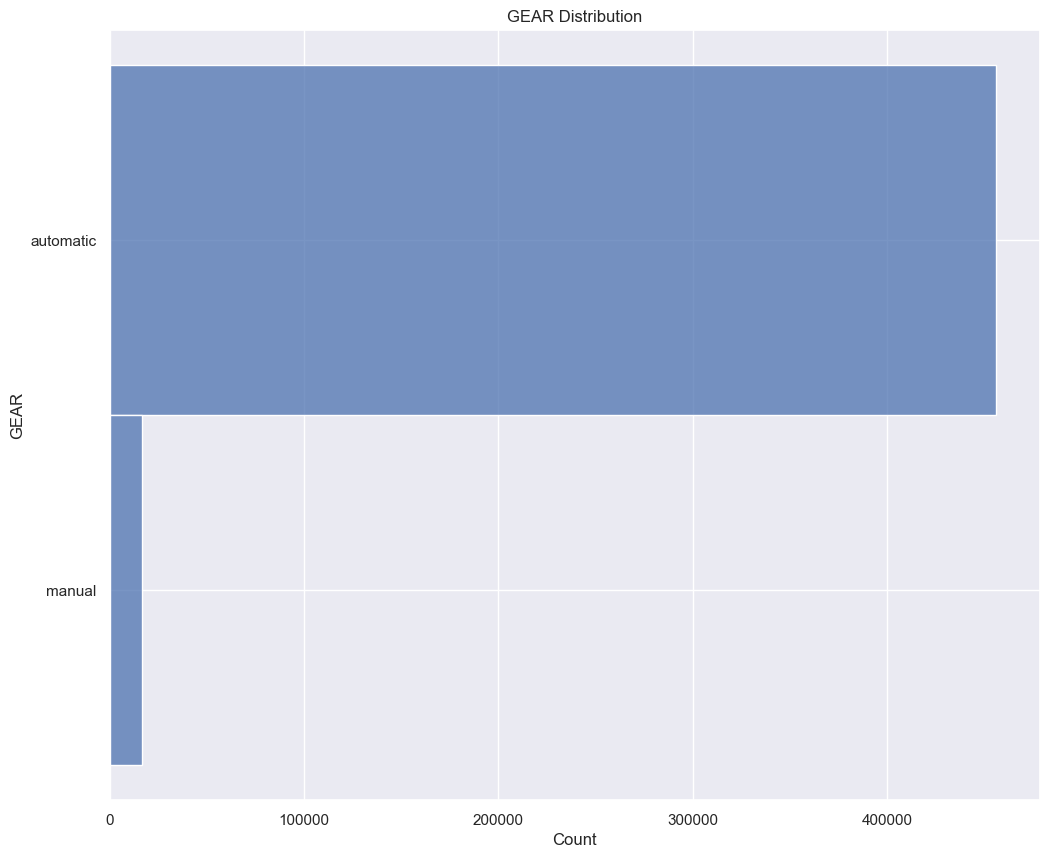

C:\Users\Dylan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


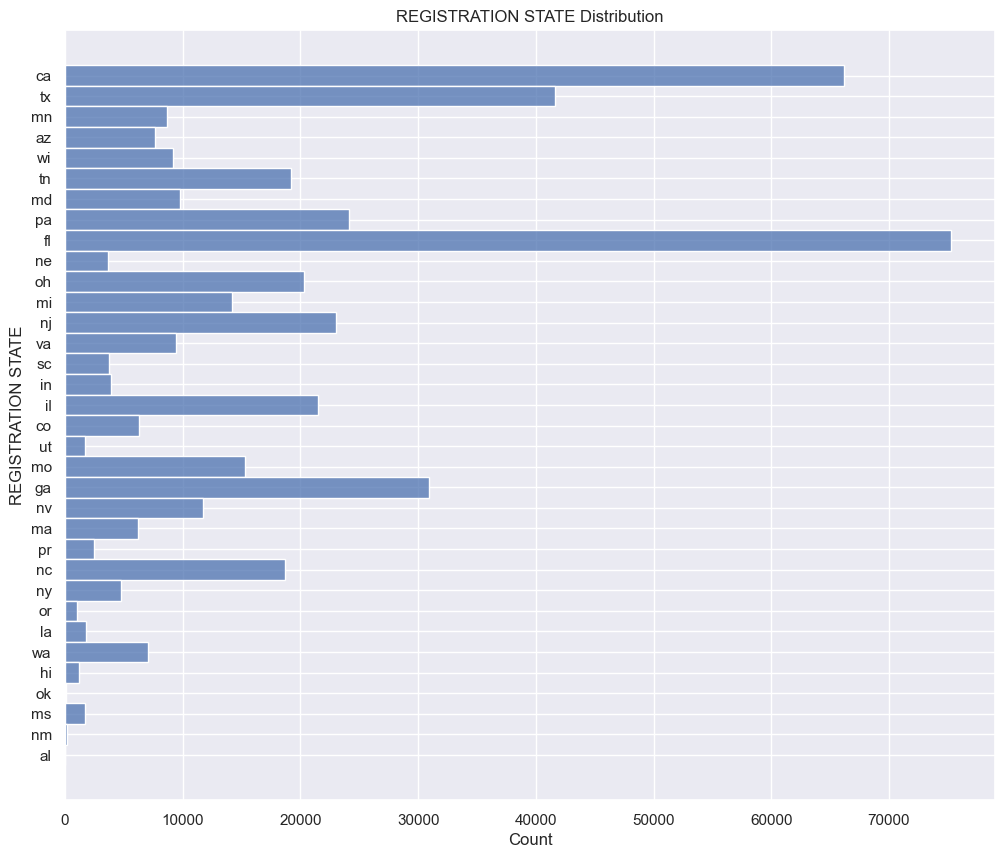

C:\Users\Dylan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


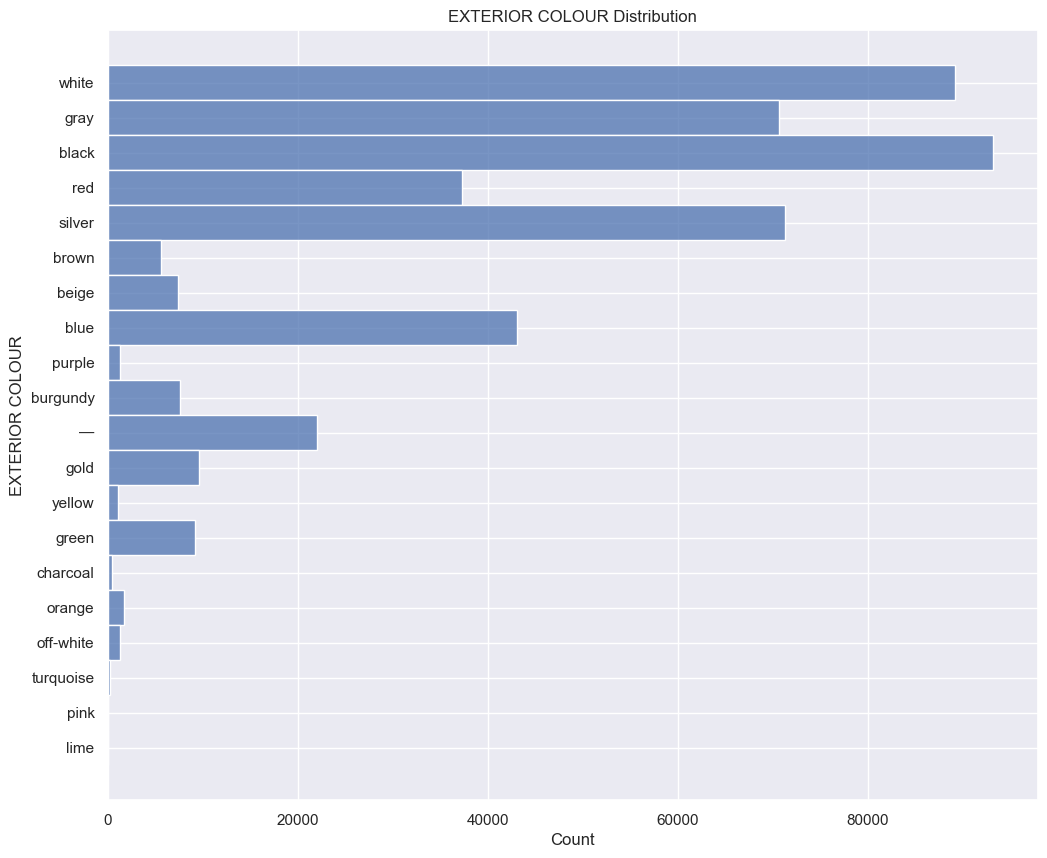

C:\Users\Dylan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


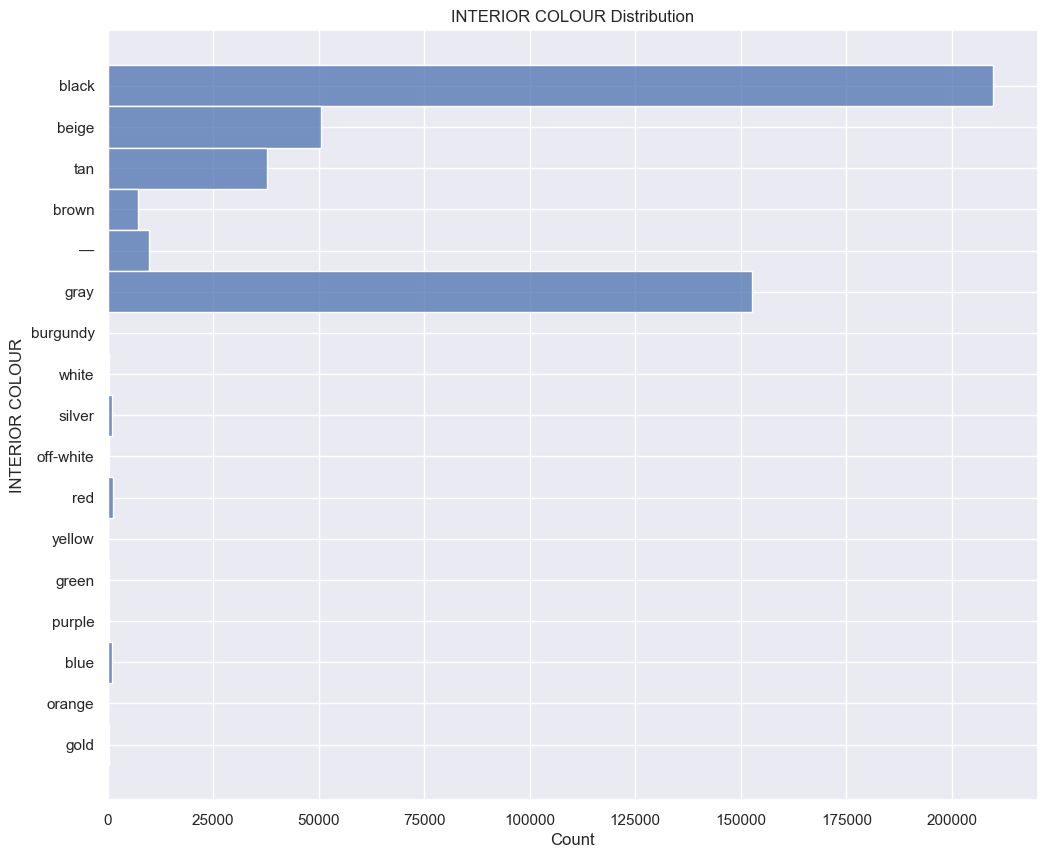

In [11]:
# Distributions of categorical variables

# Find number of unique values for categorical columns
unique_values_count = {column: cleaned_data[column].nunique() for column in categorical_columns}

# Plot distributions for columns with less than 100 unique values
for key, value in unique_values_count.items():
    if value < 100:
        plt.figure(figsize=(12, 10))
    
        # Skip SALE DATE for now due to preprocessing requirement
        if key == 'SALE DATE':
            continue
            
        sb.histplot(y=cleaned_data[key])
        # Add a title and show the plot
        plt.title(f'{key} Distribution')
        plt.show()

C:\Users\Dylan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dylan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


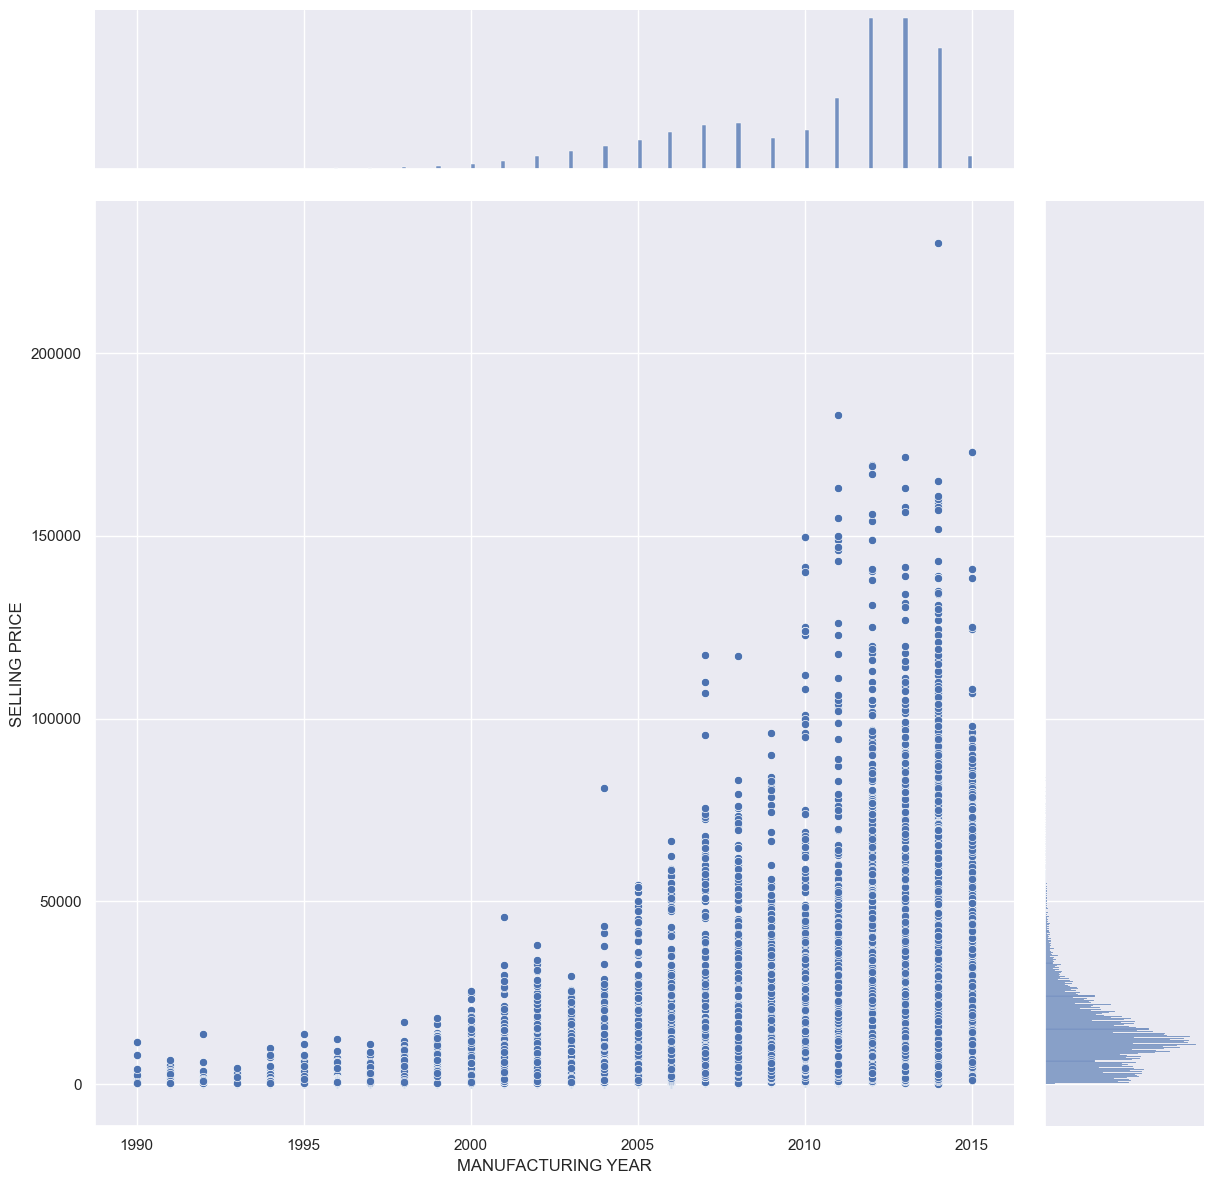

C:\Users\Dylan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dylan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


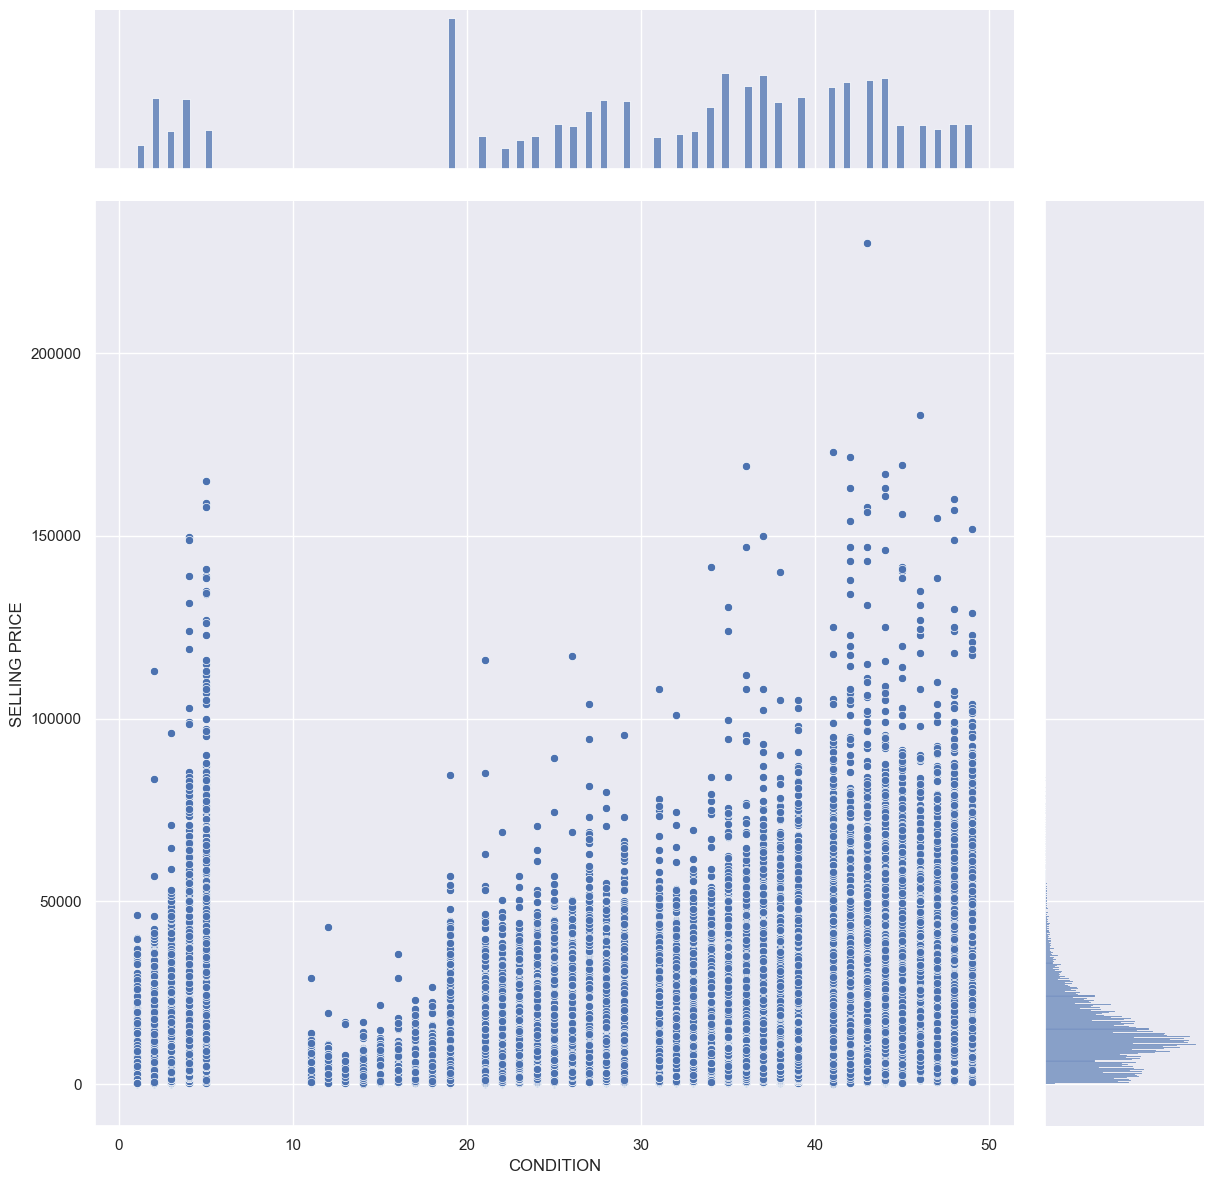

C:\Users\Dylan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dylan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


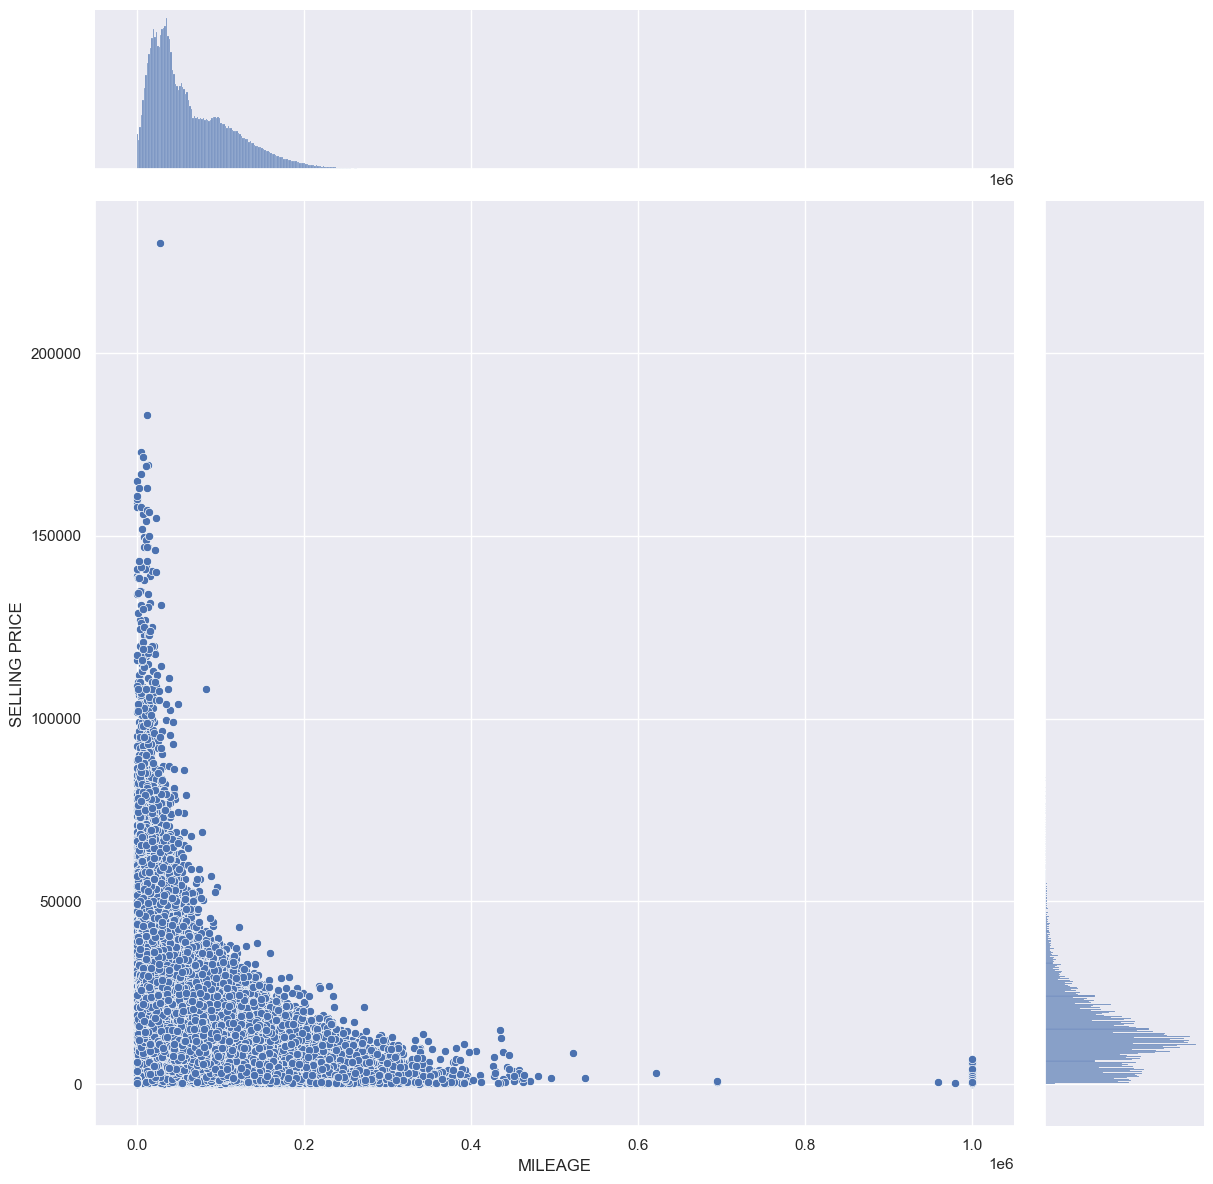

C:\Users\Dylan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dylan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


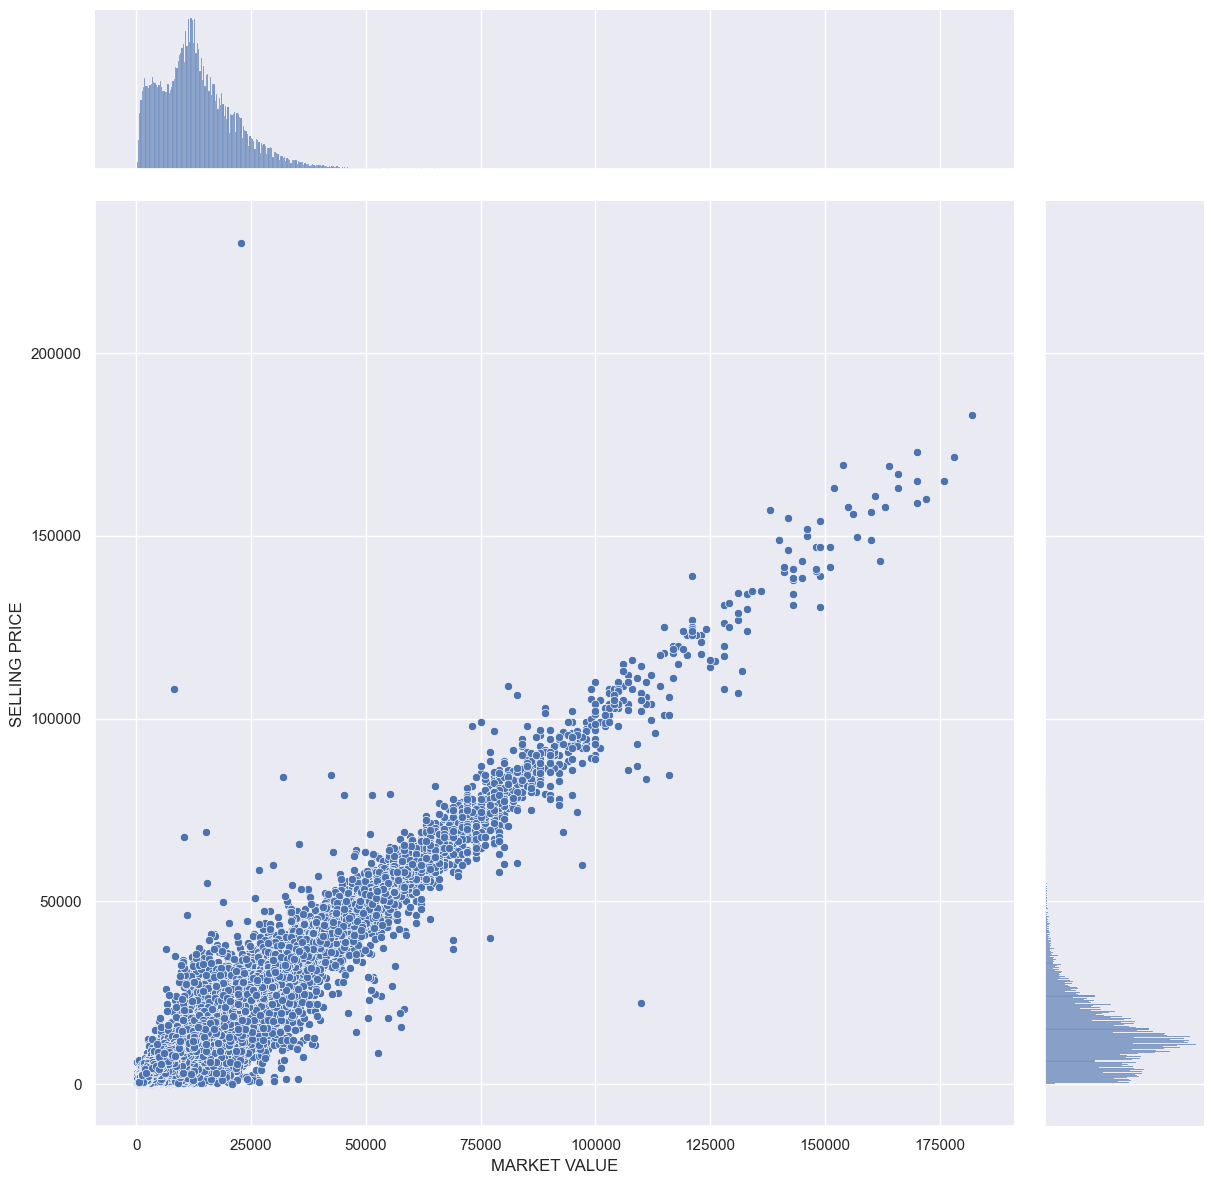

C:\Users\Dylan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dylan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


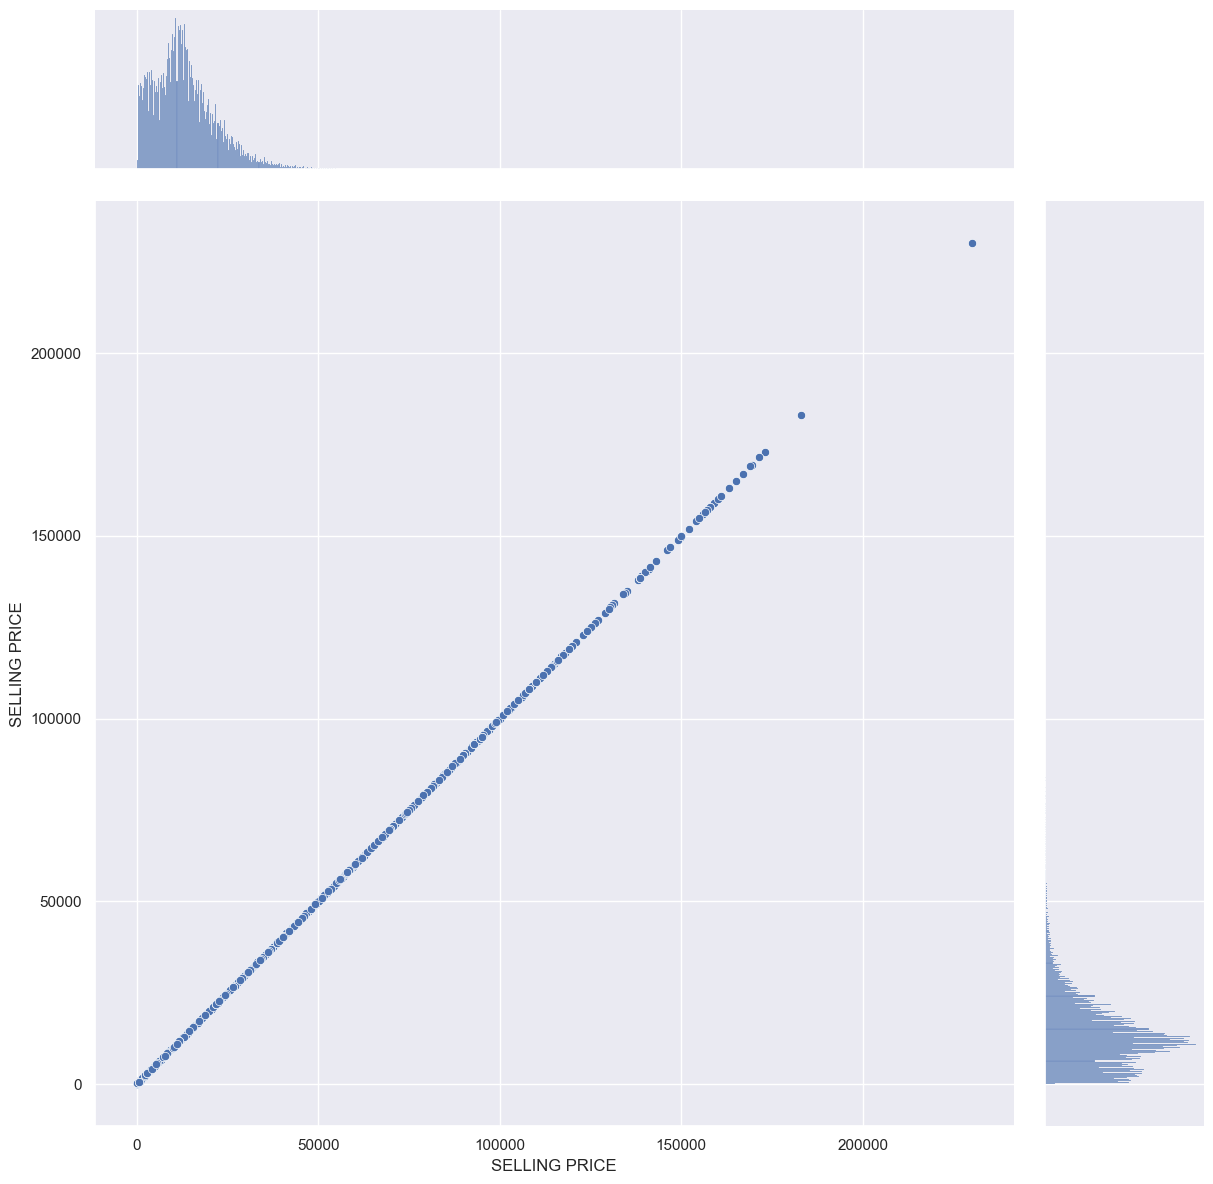

In [12]:
# Correlation between numerical variables and sale price
for col in numerical_columns:
    #f, axes = plt.subplots(10, 2, figsize=(24, 6))
    # Create a joint dataframe by concatenating the two variables
    df = pd.concat([cleaned_data[col], cleaned_data["SELLING PRICE"]], axis = 1).reindex(cleaned_data[col].index)
    
    # Jointplot    
    sb.jointplot(data = cleaned_data, x = col, y = "SELLING PRICE", height = 12)
    plt.show()

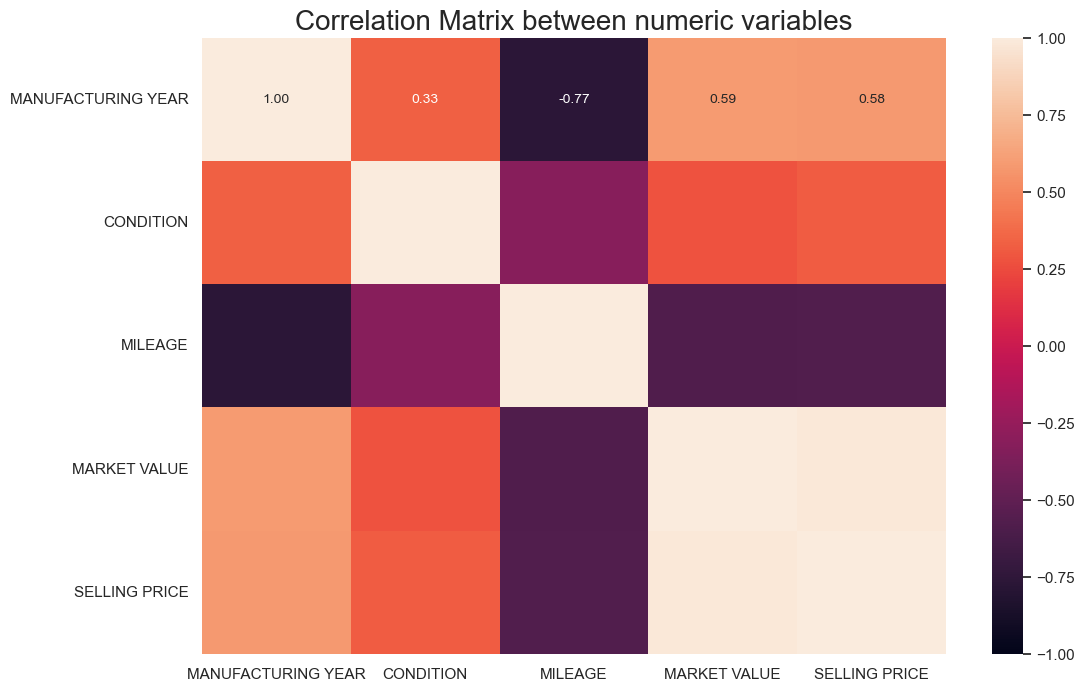

C:\Users\Dylan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dylan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dylan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dylan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

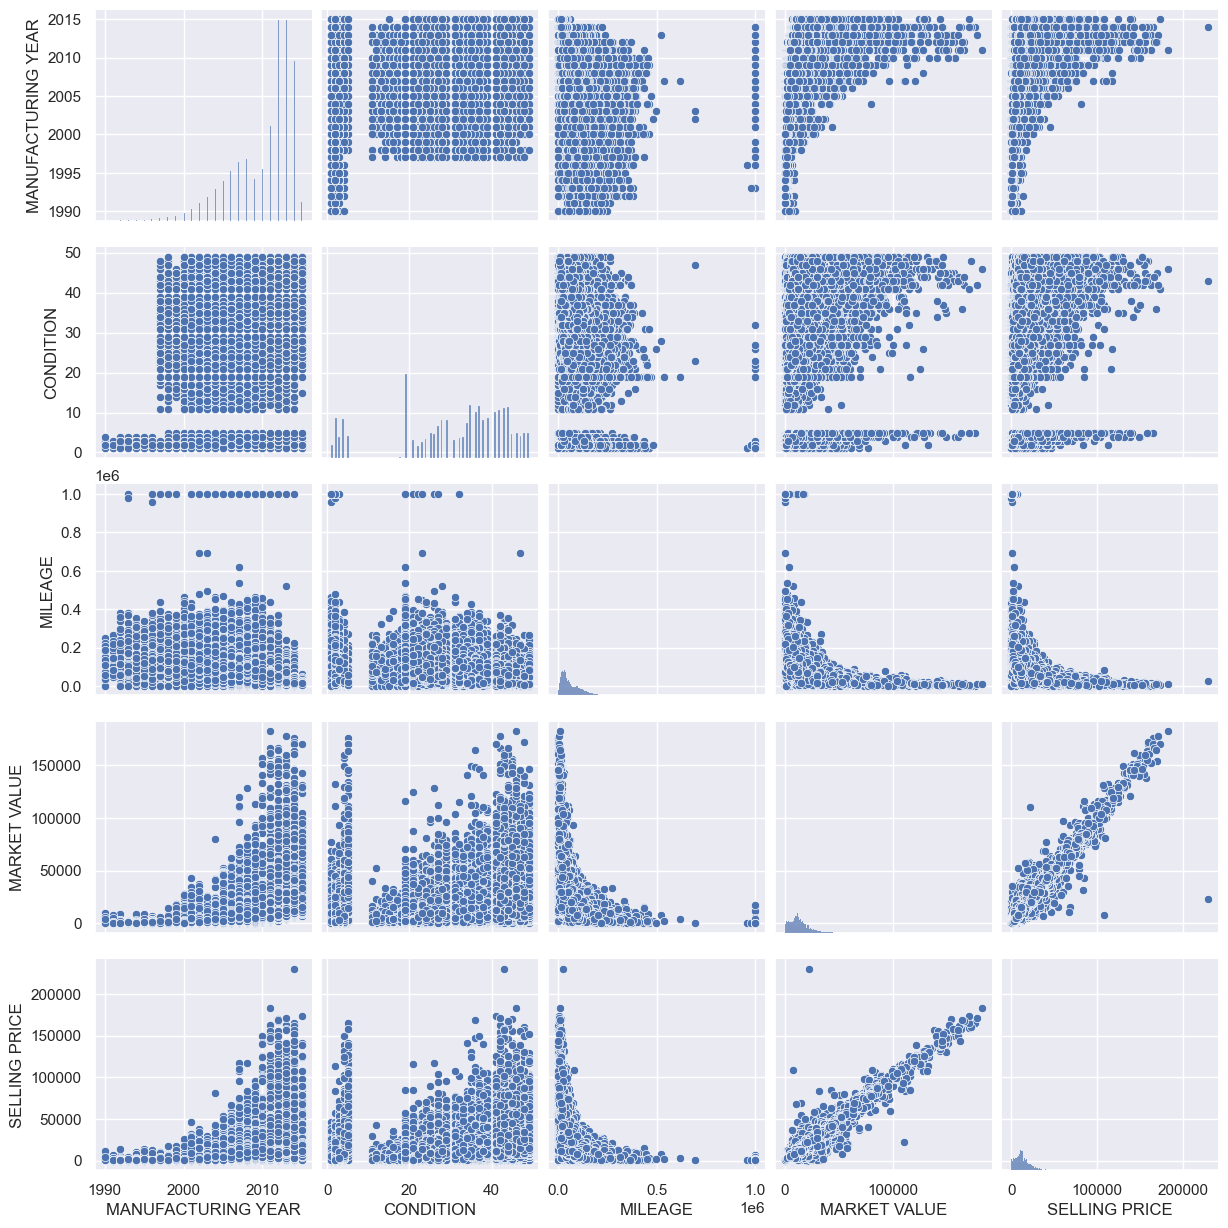

In [15]:
# Correlation between Response and the Predictors
numeric_df = cleaned_data.select_dtypes(include=['int64','float64'])
f = plt.figure(figsize=(12, 8))
sb.heatmap(numeric_df.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")
plt.title('Correlation Matrix between numeric variables', fontsize=20)
plt.show()

sb.pairplot(data = numeric_df)
plt.show()

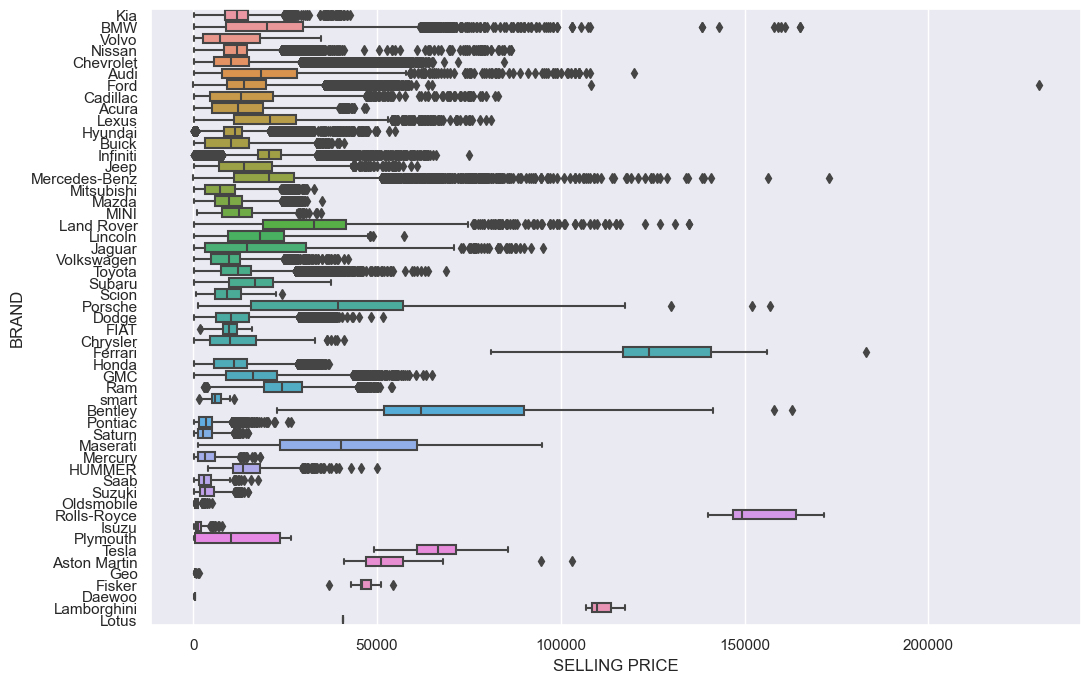

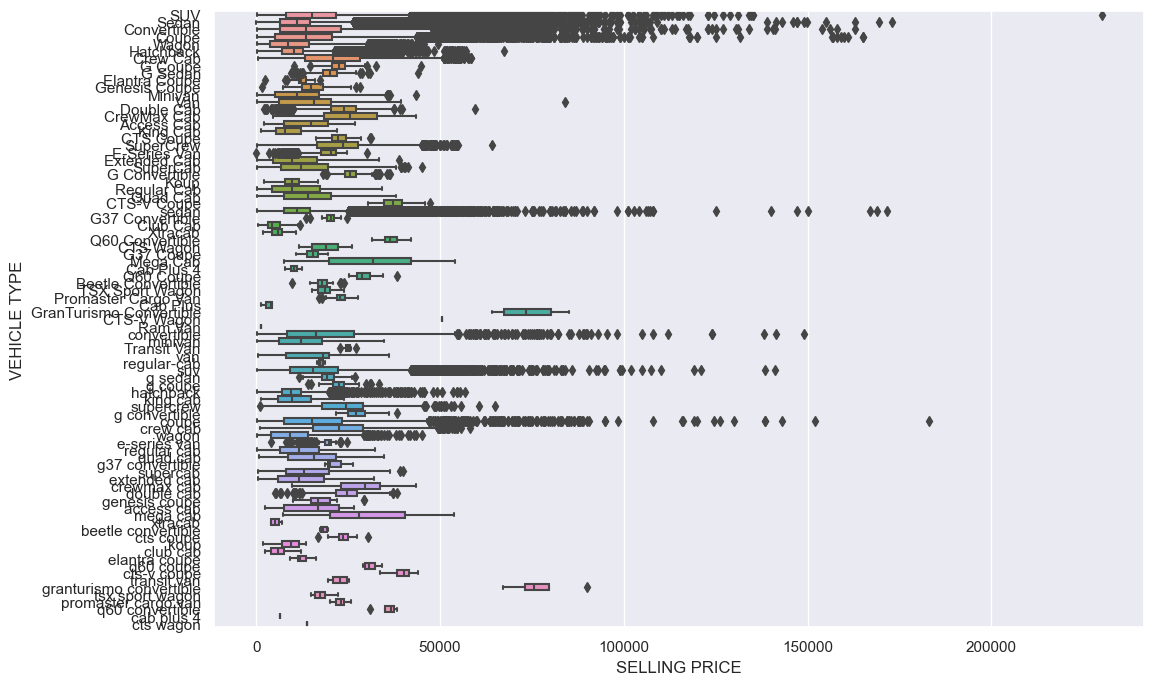

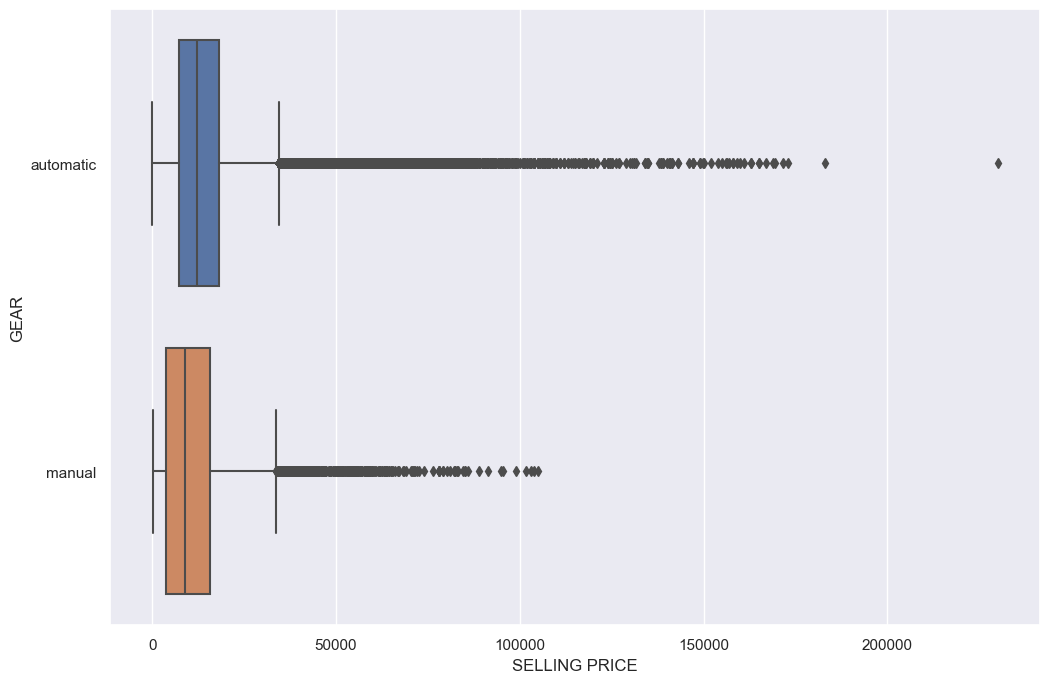

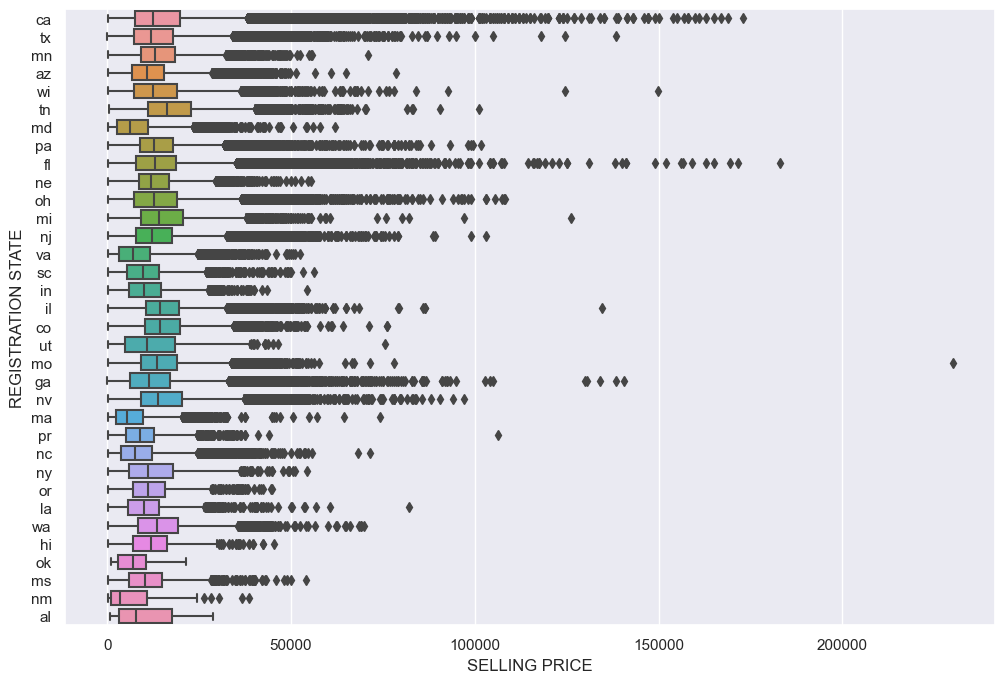

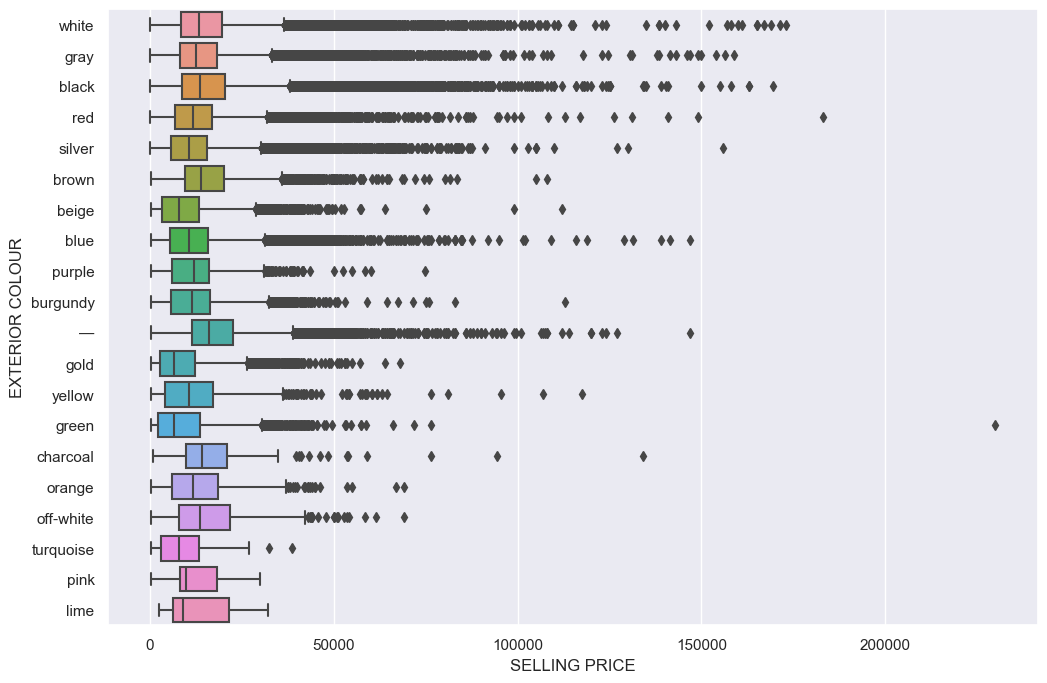

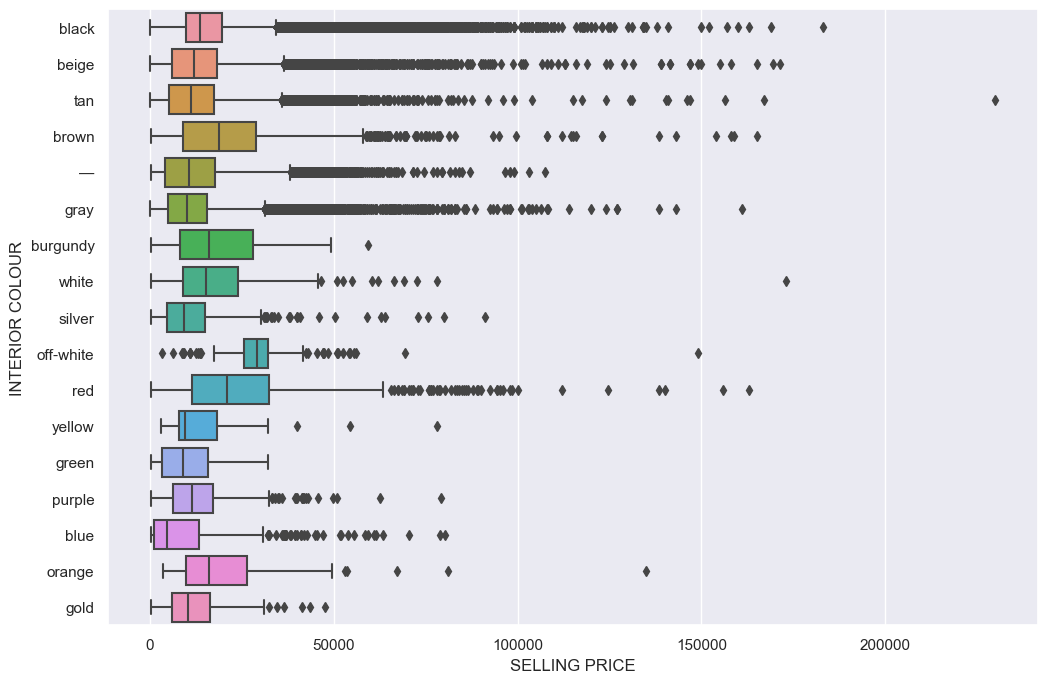

In [14]:
# Categorical variables against sale price

# Plot distributions for columns with less than 100 unique values
for col, value in unique_values_count.items():
    if value < 100:
        #f, axes = plt.subplots(10, 2, figsize=(24, 6))
        # Create a joint dataframe by concatenating the two variables
        df = pd.concat([cleaned_data[col], cleaned_data["SELLING PRICE"]], axis = 1)
        
        # Jointplot    
        f = plt.figure(figsize=(12, 8))
        sb.boxplot(x = "SELLING PRICE", y = col, data = df)
        plt.show()
